In [1]:
!pip install mediapipe
!pip install torch 
!pip install matplotlib

In [36]:


import os
from PIL import Image
def extract_word(string):
    start_index = string.find('_') + 1  # Find the index of the underscore and add 1 to exclude it
    end_index = string.find('.')  # Find the index of the dot

    if start_index < end_index and start_index > 0:
        return string[start_index:end_index]
    else:
        return None
def extract_name(string):
#     start_index = string.find('_') - 3  # Find the index of the underscore and add 1 to exclude it
    end_index = string.find('_')  # Find the index of the dot

    if 0 < end_index :
        return string[0:end_index]
    else:
        return None
def load_dataset(folder_path):
    dataset = []
    labels = []
    people = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Add more extensions if needed
                image_path = os.path.join(root, file)
                label = os.path.basename(file)
                name = extract_name(label)
                label = extract_word(label)
                
                try:
                    image = Image.open(image_path)  # Use PIL to open the image
                    dataset.append(image)
                    labels.append(label[0])
                    people.append(name)
                except (IOError, OSError):
                    print(f"Error loading image: {image_path}")

    return dataset, labels, people

# Example usage
data_path = 'C:/Users/conn3/OneDrive - Loughborough University/Datasets/RADIATE_JPEGS1'
dataset_folder = data_path
images, groundlabels, people = load_dataset(dataset_folder)

# Access individual images and labels
for image, label, person in zip(images, groundlabels,people):
    # image.show()  # Display the image using PIL
    print(label)


C
F
H
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
H
H
A
A
C
C
D
D
F
F
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
D
H
S
A
D
F
H
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
D
F
H
H
A
C
D
H
H
N
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
D
N
S
S
D
F
N
S
C
F
H
H
S
A
A
C
D
N
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
H
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
D
H
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
C
F
H
N
A
D
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
F
F
H
N
N
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
D
F
H
H
H
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
F
H
N
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
C
D
D
H
H
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
N
N
S
S
C
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
A
A
C
C
D
D
F
F
H
H
H
N
N
S
S
S
F
H
H


In [38]:
import torch
import torch.nn.functional as F
import mediapipe as mp
import cv2
import numpy as np

# Define the GNN model
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNNModel, self).__init__()

        # Define the message passing layer
        self.conv1 = torch.nn.Conv1d(input_dim, hidden_dim, kernel_size=1)
        self.conv2 = torch.nn.Conv1d(hidden_dim, hidden_dim, kernel_size=1)
        self.conv3 = torch.nn.Conv1d(hidden_dim, output_dim, kernel_size=1)

    def forward(self, x, edge_index):
        # Perform message passing
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)

        # Aggregate the results across the nodes
        x = torch.mean(x, dim=-1)

        return x

# Instantiate the GNN model
gnn = GNNModel(input_dim=3, hidden_dim=16, output_dim=8)

# Load the MediaPipe face mesh module
mp_face_mesh = mp.solutions.face_mesh.FaceMesh()
# Initialize a video capture object
newlabels = []
tensorlist = []
newpeople = []
for id, i in enumerate(images):
  

    # Detect the facial landmarks in the frame
    results = mp_face_mesh.process(cv2.cvtColor(np.array(i), cv2.COLOR_BGR2RGB))

    # Check if facial landmarks were detected
    if results.multi_face_landmarks:
        # Extract the facial landmarks for the first detected face
        landmarks = results.multi_face_landmarks[0].landmark

        # Convert the landmarks to a graph
        nodes = torch.tensor([[landmark.x, landmark.y, landmark.z] for landmark in landmarks], dtype=torch.float32)
        edges = [[i, i+1] for i in range(20)]
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

        # Pass the graph through the GNN model
        features = gnn(nodes.transpose(0, 1).unsqueeze(0), edge_index.unsqueeze(0))

        # Do something with the extracted features, e.g. print them
        print(features)
        tensorlist.append(features.detach().numpy().flatten())
            # Release the video capture and destroy the windows
        newlabels.append(groundlabels[id])
        newpeople.append(people[id])

tensor([[0.0157, 0.1452, 0.1260, 0.2259, 0.1638, 0.0672, 0.1163, 0.0022]],
       grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1451, 0.1265, 0.2260, 0.1642, 0.0674, 0.1156, 0.0018]],
       grad_fn=<MeanBackward1>)
tensor([[0.0159, 0.1446, 0.1258, 0.2265, 0.1648, 0.0679, 0.1165, 0.0025]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1447, 0.1255, 0.2264, 0.1646, 0.0678, 0.1164, 0.0021]],
       grad_fn=<MeanBackward1>)
tensor([[0.0161, 0.1443, 0.1250, 0.2270, 0.1657, 0.0685, 0.1164, 0.0020]],
       grad_fn=<MeanBackward1>)
tensor([[0.0161, 0.1442, 0.1254, 0.2270, 0.1660, 0.0686, 0.1160, 0.0017]],
       grad_fn=<MeanBackward1>)
tensor([[0.0162, 0.1440, 0.1251, 0.2273, 0.1666, 0.0690, 0.1160, 0.0017]],
       grad_fn=<MeanBackward1>)
tensor([[0.0160, 0.1443, 0.1251, 0.2269, 0.1655, 0.0684, 0.1164, 0.0020]],
       grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1445, 0.1260, 0.2264, 0.1655, 0.0681, 0.1153, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0159, 0.1443, 0.1259, 0.22

tensor([[ 0.0149,  0.1451,  0.1288,  0.2250,  0.1645,  0.0672,  0.1128, -0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5252e-02,  1.4446e-01,  1.2752e-01,  2.2599e-01,  1.6579e-01,
          6.7988e-02,  1.1374e-01, -3.4820e-05]], grad_fn=<MeanBackward1>)
tensor([[ 0.0146,  0.1450,  0.1289,  0.2250,  0.1648,  0.0672,  0.1125, -0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0151,  0.1445,  0.1280,  0.2258,  0.1657,  0.0678,  0.1133, -0.0003]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1443, 0.1266, 0.2265, 0.1661, 0.0684, 0.1145, 0.0005]],
       grad_fn=<MeanBackward1>)
tensor([[1.5328e-02, 1.4443e-01, 1.2720e-01, 2.2611e-01, 1.6585e-01, 6.8052e-02,
         1.1399e-01, 9.7790e-05]], grad_fn=<MeanBackward1>)
tensor([[ 0.0151,  0.1445,  0.1278,  0.2258,  0.1660,  0.0680,  0.1131, -0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0154,  0.1440,  0.1278,  0.2265,  0.1672,  0.0687,  0.1129, -0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0150,  0.1448,  

tensor([[0.0157, 0.1445, 0.1266, 0.2264, 0.1661, 0.0684, 0.1144, 0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1448, 0.1272, 0.2259, 0.1649, 0.0677, 0.1145, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1446, 0.1273, 0.2260, 0.1650, 0.0677, 0.1148, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1450, 0.1280, 0.2255, 0.1645, 0.0674, 0.1140, 0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[0.0152, 0.1451, 0.1282, 0.2254, 0.1643, 0.0673, 0.1139, 0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[0.0151, 0.1452, 0.1282, 0.2253, 0.1642, 0.0670, 0.1139, 0.0005]],
       grad_fn=<MeanBackward1>)
tensor([[0.0152, 0.1446, 0.1280, 0.2258, 0.1649, 0.0675, 0.1142, 0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1448, 0.1279, 0.2258, 0.1651, 0.0676, 0.1140, 0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[0.0151, 0.1453, 0.1283, 0.2251, 0.1637, 0.0668, 0.1141, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1444, 0.1272, 0.22

tensor([[0.0161, 0.1442, 0.1259, 0.2271, 0.1664, 0.0687, 0.1154, 0.0014]],
       grad_fn=<MeanBackward1>)
tensor([[0.0150, 0.1455, 0.1273, 0.2250, 0.1628, 0.0662, 0.1154, 0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1445, 0.1263, 0.2265, 0.1657, 0.0682, 0.1151, 0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0155,  0.1441,  0.1277,  0.2265,  0.1671,  0.0688,  0.1130, -0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5474e-02,  1.4438e-01,  1.2723e-01,  2.2630e-01,  1.6621e-01,
          6.8331e-02,  1.1380e-01, -8.7823e-06]], grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1445, 0.1268, 0.2263, 0.1657, 0.0681, 0.1145, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0145,  0.1455,  0.1291,  0.2245,  0.1633,  0.0663,  0.1131, -0.0003]],
       grad_fn=<MeanBackward1>)
tensor([[0.0152, 0.1449, 0.1273, 0.2257, 0.1648, 0.0674, 0.1142, 0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[1.5401e-02, 1.4468e-01, 1.2734e-01, 2.2599e-01, 1.6564e-01, 6.7959e-02,
     

tensor([[ 1.5186e-02,  1.4468e-01,  1.2798e-01,  2.2572e-01,  1.6547e-01,
          6.7897e-02,  1.1327e-01, -1.9162e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1453, 0.1266, 0.2255, 0.1634, 0.0668, 0.1158, 0.0018]],
       grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1445, 0.1258, 0.2264, 0.1652, 0.0680, 0.1158, 0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1444, 0.1257, 0.2266, 0.1658, 0.0684, 0.1154, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0161, 0.1441, 0.1256, 0.2270, 0.1666, 0.0689, 0.1153, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1445, 0.1260, 0.2265, 0.1656, 0.0682, 0.1154, 0.0012]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1449, 0.1268, 0.2257, 0.1646, 0.0674, 0.1149, 0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1446, 0.1257, 0.2264, 0.1651, 0.0680, 0.1159, 0.0016]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1448, 0.1270, 0.2259, 0.1649, 0.0676, 0.1147, 0.0008]],
       grad_fn=<MeanBackwar

tensor([[ 1.5327e-02,  1.4451e-01,  1.2818e-01,  2.2592e-01,  1.6594e-01,
          6.8126e-02,  1.1308e-01, -1.7499e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1452, 0.1264, 0.2255, 0.1640, 0.0671, 0.1153, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1449, 0.1262, 0.2259, 0.1645, 0.0675, 0.1155, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1454, 0.1265, 0.2254, 0.1633, 0.0667, 0.1158, 0.0017]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1452, 0.1265, 0.2256, 0.1639, 0.0670, 0.1155, 0.0014]],
       grad_fn=<MeanBackward1>)
tensor([[0.0149, 0.1455, 0.1276, 0.2249, 0.1633, 0.0664, 0.1146, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1447, 0.1258, 0.2264, 0.1653, 0.0681, 0.1155, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1447, 0.1261, 0.2264, 0.1655, 0.0681, 0.1151, 0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[0.0162, 0.1446, 0.1254, 0.2269, 0.1658, 0.0685, 0.1158, 0.0016]],
       grad_fn=<MeanBackwar

tensor([[0.0155, 0.1443, 0.1277, 0.2264, 0.1661, 0.0682, 0.1139, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1446, 0.1273, 0.2261, 0.1651, 0.0677, 0.1146, 0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1447, 0.1274, 0.2260, 0.1651, 0.0677, 0.1145, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1448, 0.1276, 0.2258, 0.1649, 0.0675, 0.1144, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[1.5239e-02, 1.4457e-01, 1.2830e-01, 2.2584e-01, 1.6556e-01, 6.7787e-02,
         1.1340e-01, 1.7735e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1444, 0.1271, 0.2264, 0.1656, 0.0680, 0.1147, 0.0012]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1442, 0.1274, 0.2266, 0.1662, 0.0683, 0.1143, 0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1441, 0.1276, 0.2265, 0.1665, 0.0684, 0.1139, 0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1446, 0.1273, 0.2261, 0.1652, 0.0678, 0.1146, 0.0010]],
       grad_fn=<MeanBackward1>)
ten

tensor([[0.0150, 0.1454, 0.1280, 0.2251, 0.1631, 0.0664, 0.1148, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1450, 0.1275, 0.2258, 0.1644, 0.0672, 0.1149, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0151, 0.1453, 0.1280, 0.2254, 0.1639, 0.0669, 0.1143, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1452, 0.1275, 0.2256, 0.1642, 0.0672, 0.1145, 0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1449, 0.1273, 0.2259, 0.1645, 0.0674, 0.1149, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0152, 0.1454, 0.1279, 0.2253, 0.1635, 0.0668, 0.1146, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[1.5347e-02, 1.4459e-01, 1.2889e-01, 2.2590e-01, 1.6570e-01, 6.8085e-02,
         1.1282e-01, 1.5046e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1449, 0.1277, 0.2258, 0.1646, 0.0676, 0.1144, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1450, 0.1281, 0.2256, 0.1646, 0.0674, 0.1139, 0.0006]],
       grad_fn=<MeanBackward1>)
ten

tensor([[0.0153, 0.1449, 0.1270, 0.2258, 0.1646, 0.0675, 0.1147, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5385e-02,  1.4457e-01,  1.2808e-01,  2.2593e-01,  1.6581e-01,
          6.8176e-02,  1.1317e-01, -4.1422e-05]], grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1449, 0.1269, 0.2258, 0.1643, 0.0674, 0.1153, 0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1449, 0.1272, 0.2258, 0.1648, 0.0676, 0.1144, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1444, 0.1271, 0.2264, 0.1662, 0.0684, 0.1140, 0.0003]],
       grad_fn=<MeanBackward1>)
tensor([[0.0160, 0.1443, 0.1261, 0.2268, 0.1661, 0.0686, 0.1152, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1447, 0.1267, 0.2261, 0.1654, 0.0680, 0.1145, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1443, 0.1266, 0.2266, 0.1663, 0.0686, 0.1144, 0.0005]],
       grad_fn=<MeanBackward1>)
tensor([[0.0160, 0.1444, 0.1261, 0.2268, 0.1659, 0.0685, 0.1153, 0.0014]],
       grad_fn=<MeanBackwar

tensor([[0.0163, 0.1433, 0.1271, 0.2278, 0.1686, 0.0697, 0.1139, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1445, 0.1276, 0.2262, 0.1656, 0.0680, 0.1142, 0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1446, 0.1274, 0.2261, 0.1653, 0.0679, 0.1144, 0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1446, 0.1277, 0.2260, 0.1653, 0.0678, 0.1141, 0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1443, 0.1277, 0.2263, 0.1660, 0.0681, 0.1140, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1447, 0.1272, 0.2260, 0.1650, 0.0677, 0.1147, 0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1447, 0.1273, 0.2260, 0.1652, 0.0677, 0.1143, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1448, 0.1276, 0.2258, 0.1648, 0.0675, 0.1144, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[1.5228e-02, 1.4462e-01, 1.2836e-01, 2.2580e-01, 1.6552e-01, 6.7766e-02,
         1.1330e-01, 9.7837e-05]], grad_fn=<MeanBackward1>)
ten

       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1443, 0.1278, 0.2263, 0.1662, 0.0684, 0.1136, 0.0003]],
       grad_fn=<MeanBackward1>)
tensor([[1.5341e-02, 1.4438e-01, 1.2803e-01, 2.2603e-01, 1.6600e-01, 6.8252e-02,
         1.1327e-01, 8.7964e-06]], grad_fn=<MeanBackward1>)
tensor([[ 1.5378e-02,  1.4432e-01,  1.2811e-01,  2.2609e-01,  1.6617e-01,
          6.8366e-02,  1.1314e-01, -3.8101e-05]], grad_fn=<MeanBackward1>)
tensor([[ 0.0150,  0.1447,  0.1291,  0.2254,  0.1656,  0.0679,  0.1122, -0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0148,  0.1450,  0.1292,  0.2250,  0.1647,  0.0673,  0.1125, -0.0005]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5598e-02,  1.4416e-01,  1.2811e-01,  2.2639e-01,  1.6685e-01,
          6.8764e-02,  1.1289e-01, -1.9167e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0157, 0.1446, 0.1271, 0.2262, 0.1657, 0.0683, 0.1142, 0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1448, 0.1269, 0.2262, 0.1654, 0.0681, 0.1145, 0.0009]],
       gra

tensor([[ 0.0157,  0.1438,  0.1277,  0.2269,  0.1678,  0.0692,  0.1130, -0.0005]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0159,  0.1436,  0.1272,  0.2273,  0.1682,  0.0696,  0.1132, -0.0003]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5934e-02,  1.4365e-01,  1.2729e-01,  2.2728e-01,  1.6811e-01,
          6.9428e-02,  1.1336e-01, -1.5000e-04]], grad_fn=<MeanBackward1>)
tensor([[ 0.0159,  0.1432,  0.1285,  0.2275,  0.1694,  0.0700,  0.1118, -0.0010]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.6476e-02,  1.4277e-01,  1.2783e-01,  2.2838e-01,  1.7037e-01,
          7.0658e-02,  1.1266e-01, -2.2129e-04]], grad_fn=<MeanBackward1>)
tensor([[ 0.0156,  0.1439,  0.1278,  0.2267,  0.1676,  0.0691,  0.1128, -0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0156,  0.1441,  0.1276,  0.2266,  0.1671,  0.0688,  0.1133, -0.0002]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5928e-02,  1.4367e-01,  1.2712e-01,  2.2724e-01,  1.6800e-01,
          6.9360e-02,  1.1354e-01, -5.3927e-05]], gra

tensor([[0.0162, 0.1440, 0.1267, 0.2273, 0.1672, 0.0692, 0.1144, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1450, 0.1270, 0.2258, 0.1644, 0.0674, 0.1150, 0.0013]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1449, 0.1269, 0.2261, 0.1649, 0.0678, 0.1148, 0.0012]],
       grad_fn=<MeanBackward1>)
tensor([[0.0159, 0.1447, 0.1263, 0.2265, 0.1653, 0.0681, 0.1153, 0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[0.0160, 0.1447, 0.1262, 0.2265, 0.1653, 0.0681, 0.1155, 0.0016]],
       grad_fn=<MeanBackward1>)
tensor([[0.0161, 0.1443, 0.1268, 0.2269, 0.1665, 0.0688, 0.1145, 0.0011]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1452, 0.1269, 0.2256, 0.1638, 0.0670, 0.1153, 0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[0.0154, 0.1454, 0.1269, 0.2255, 0.1640, 0.0672, 0.1148, 0.0009]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1453, 0.1268, 0.2255, 0.1637, 0.0670, 0.1152, 0.0012]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1452, 0.1269, 0.22

          6.8535e-02,  1.1352e-01, -1.5433e-04]], grad_fn=<MeanBackward1>)
tensor([[ 0.0153,  0.1443,  0.1281,  0.2261,  0.1666,  0.0685,  0.1126, -0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0156,  0.1441,  0.1273,  0.2266,  0.1670,  0.0690,  0.1132, -0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[1.5872e-02, 1.4403e-01, 1.2709e-01, 2.2693e-01, 1.6718e-01, 6.9125e-02,
         1.1370e-01, 1.4735e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0158, 0.1441, 0.1270, 0.2267, 0.1668, 0.0689, 0.1139, 0.0002]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0156,  0.1440,  0.1275,  0.2267,  0.1672,  0.0690,  0.1131, -0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0160,  0.1435,  0.1275,  0.2274,  0.1686,  0.0699,  0.1128, -0.0006]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0157,  0.1438,  0.1279,  0.2268,  0.1678,  0.0694,  0.1126, -0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0157,  0.1438,  0.1278,  0.2268,  0.1677,  0.0693,  0.1127, -0.0006]],
       grad_fn=<Mea

tensor([[0.0154, 0.1447, 0.1268, 0.2260, 0.1643, 0.0674, 0.1156, 0.0018]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1447, 0.1265, 0.2262, 0.1645, 0.0676, 0.1158, 0.0020]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1449, 0.1261, 0.2260, 0.1642, 0.0675, 0.1160, 0.0020]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1448, 0.1263, 0.2260, 0.1643, 0.0675, 0.1158, 0.0018]],
       grad_fn=<MeanBackward1>)
tensor([[0.0155, 0.1448, 0.1266, 0.2260, 0.1644, 0.0675, 0.1157, 0.0019]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1445, 0.1269, 0.2263, 0.1651, 0.0679, 0.1154, 0.0018]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1447, 0.1265, 0.2262, 0.1651, 0.0679, 0.1151, 0.0012]],
       grad_fn=<MeanBackward1>)
tensor([[0.0156, 0.1453, 0.1265, 0.2257, 0.1640, 0.0673, 0.1154, 0.0014]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1448, 0.1271, 0.2258, 0.1642, 0.0673, 0.1154, 0.0017]],
       grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1449, 0.1273, 0.22

         1.1404e-01, 1.7074e-04]], grad_fn=<MeanBackward1>)
tensor([[0.0153, 0.1448, 0.1273, 0.2258, 0.1651, 0.0676, 0.1142, 0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[ 1.5395e-02,  1.4453e-01,  1.2680e-01,  2.2607e-01,  1.6581e-01,
          6.8100e-02,  1.1410e-01, -6.6962e-06]], grad_fn=<MeanBackward1>)
tensor([[ 0.0157,  0.1439,  0.1266,  0.2269,  0.1675,  0.0691,  0.1138, -0.0004]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0153,  0.1442,  0.1271,  0.2263,  0.1668,  0.0685,  0.1134, -0.0007]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0153,  0.1442,  0.1272,  0.2262,  0.1668,  0.0684,  0.1132, -0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0153,  0.1439,  0.1274,  0.2264,  0.1676,  0.0689,  0.1126, -0.0015]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0154,  0.1441,  0.1271,  0.2264,  0.1671,  0.0687,  0.1133, -0.0008]],
       grad_fn=<MeanBackward1>)
tensor([[ 0.0152,  0.1443,  0.1277,  0.2260,  0.1666,  0.0683,  0.1129, -0.0010]],
       grad_fn=<MeanBackwa

In [39]:
import pandas as pd
df = pd.DataFrame(newlabels,columns= ['Labels'])
df1 = pd.DataFrame(newpeople, columns = ['People'])
df = pd.concat([df,df1],axis=1)
print(df)

     Labels People
0         C   AF01
1         F   AF01
2         H   AF01
3         A   AF02
4         A   AF02
...     ...    ...
1209      N   HF10
1210      N   HF10
1211      S   HF10
1212      S   HF10
1213      S   HF10

[1214 rows x 2 columns]


In [40]:
df_group = df.groupby('People')
lists = []
for i, j in df_group:
    print(i,j.index.tolist())
    lists.append(j.index.tolist())

AF01 [0, 1, 2, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]
AF02 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]
AF03 [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 122, 123, 124, 125, 126, 127]
AF05 [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
AF06 [49, 50, 51]
AF07 [52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 128, 129, 130, 131, 132, 133, 134]
AF08 [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
AF09 [83, 84, 85, 86, 151, 152, 153, 154, 155, 156]
AF10 [157, 158, 159, 160]
AF11 [161, 162, 163, 164, 165]
AF12 [87, 88, 89, 90]
AM01 [166, 167, 168, 169, 170, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]
AM02 [171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 296, 297, 298, 29

In [41]:
print(np.array(lists).shape)

(64,)


C:\Users\conn3\AppData\Local\Temp/ipykernel_14376/4142742294.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(lists).shape)


In [42]:
#count of all the labels 
uniquelabels =[]
countlabels = []
id = 0

for i in groundlabels:
  if i not in uniquelabels:
    uniquelabels.append(i)
for i in uniquelabels:
  count = 0
  for j in groundlabels:
    if i == j:
      count += 1
  countlabels.append(count)
  id +=1
print(uniquelabels)
print(countlabels)
sum(countlabels)

['C', 'F', 'H', 'A', 'D', 'N', 'S']
[154, 147, 231, 155, 153, 146, 230]


1216

In [38]:
!cd RADIATE_JPEGS1/
!dir

 Volume in drive C is Windows
 Volume Serial Number is 8A1A-2CBF

 Directory of C:\Users\conn3\OneDrive - Loughborough University\Datasets

14/06/2023  17:22    <DIR>          .
14/06/2023  17:22    <DIR>          ..
14/06/2023  14:54    <DIR>          .ipynb_checkpoints
14/06/2023  14:54    <DIR>          300w
14/06/2023  14:54    <DIR>          RADIATE_JPEGS1
04/06/2023  22:57   (1,473,485,405) RADIATE_JPEGS1.zip
14/06/2023  15:56           772,619 TestsDatasetsvisual.ipynb
14/06/2023  17:22           594,082 Untitled.ipynb
               3 File(s)  1,474,852,106 bytes
               5 Dir(s)  298,740,506,624 bytes free


In [99]:
people


['AF01',
 'AF01',
 'AF01',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF03',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF05',
 'AF06',
 'AF06',
 'AF06',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF07',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF08',
 'AF09',
 'AF09',
 'AF09',
 'AF09',
 'AF12',
 'AF12',
 'AF12',
 'AF12',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF01',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 'AF02',
 

In [12]:
count(images)

C:\Users\conn3\AppData\Local\Temp/ipykernel_12300/3287615203.py:1: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.array(images).shape
C:\Users\conn3\AppData\Local\Temp/ipykernel_12300/3287615203.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(images).shape


(1216,)

In [43]:
import numpy as np
from sklearn.cluster import KMeans

# Convert the PyTorch tensor to a NumPy array
features = np.array(tensorlist)

# Perform k-means clustering on the features
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(features)

In [44]:
print(np.array(newlabels).shape
,np.array(X).shape
,np.array(groundlabels).shape)

(1214,) (1214, 8) (1216,)


In [45]:
#count of all the labels 
uniquelabels =[]
countlabels = []
id = 0

for i in newlabels:
  if i not in uniquelabels:
    uniquelabels.append(i)
for i in uniquelabels:
  count = 0
  for j in groundlabels:
    if i == j:
      count += 1
  countlabels.append(count)
  id +=1
print(uniquelabels)
print(countlabels)
sum(countlabels)

['C', 'F', 'H', 'A', 'D', 'N', 'S']
[154, 147, 231, 155, 153, 146, 230]


1216

In [46]:
truelabels = np.zeros(len(newlabels))
for tag,i in enumerate(newlabels):
    for id,j in enumerate(uniquelabels):
        if i == j:
            truelabels[tag]= id
            print(tag)
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
for i in lists:
#     print(truelabels[i])
    for j in i:
        print(truelabels[j])
        

0.0
1.0
2.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
0.0
4.0
1.0
2.0
2.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
2.0
2.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
0.0
4.0
2.0
2.0
5.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
4.0
2.0
6.0
3.0
0.0
4.0
5.0
6.0
6.0
4.0
1.0
5.0
6.0
0.0
1.0
2.0
2.0
6.0
3.0
4.0
1.0
2.0
3.0
3.0
0.0
4.0
5.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0
2.0
2.0
5.0
5.0
6.0
6.0
6.0
3.0
0.0
0.0
1.0
2.0
5.0
3.0
3.0
0.0
0.0
4.0
4.0
1.0
1.0
2.0


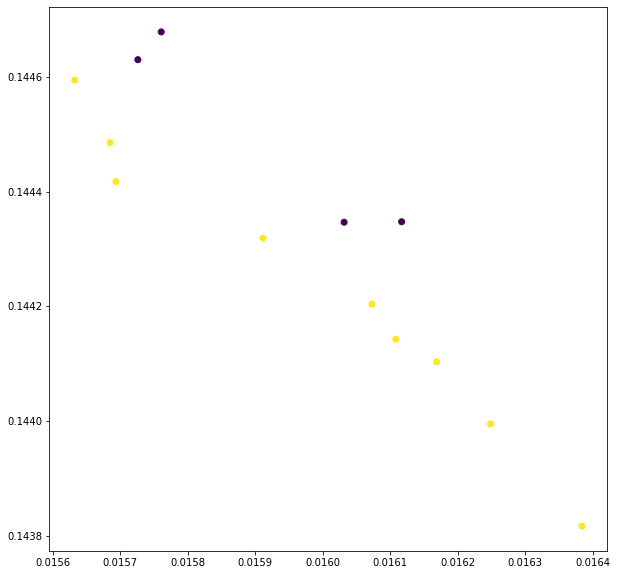

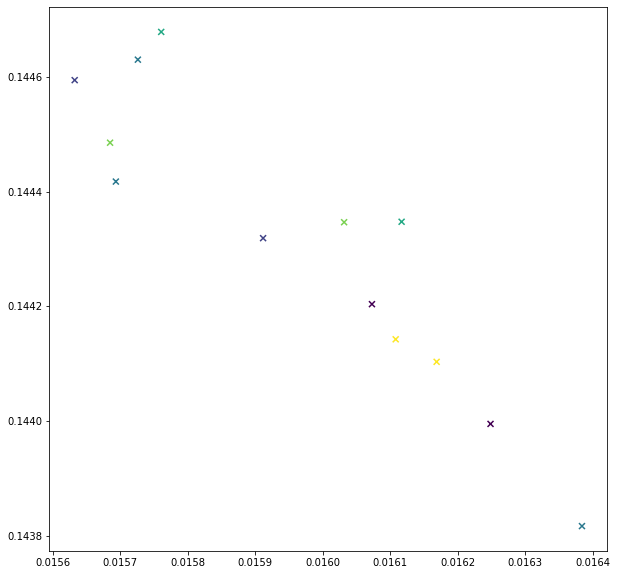

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = features
plt.figure(figsize=(10,10))
plt.scatter(X[3:16, 0], X[3:16, 1], c=labels[3:16])
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(X[3:16, 0], X[3:16, 1], c=truelabels[3:16], marker='x')
plt.show()

[0, 1, 2, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]


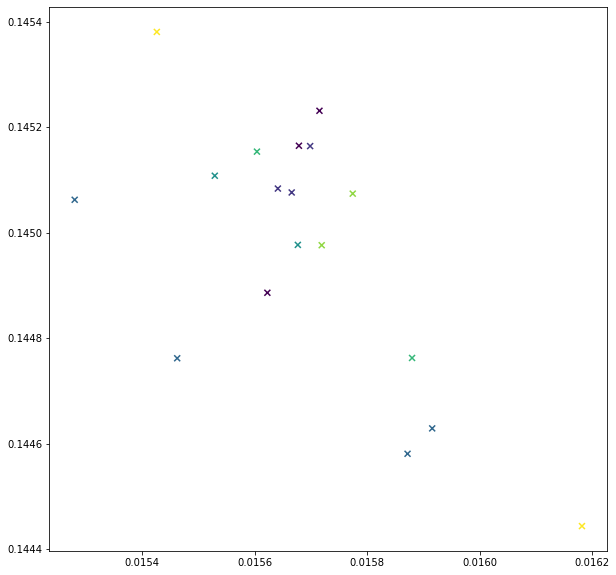

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121]


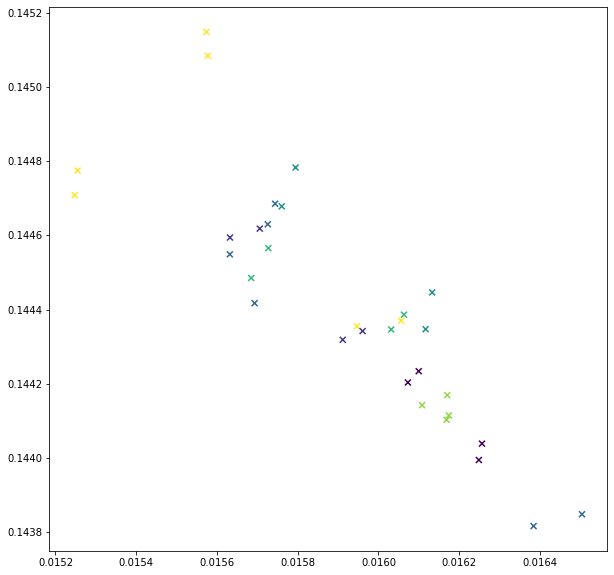

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 122, 123, 124, 125, 126, 127]


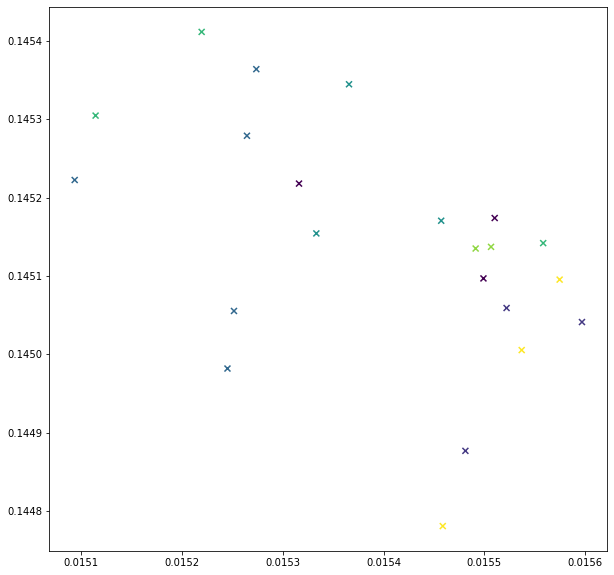

[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


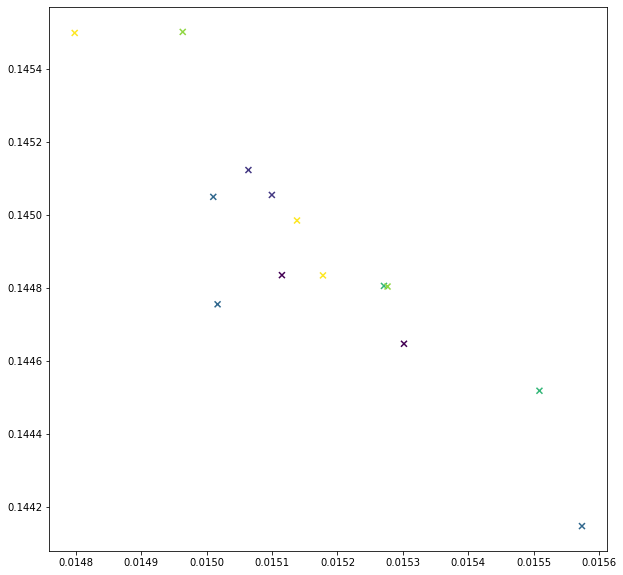

[49, 50, 51]


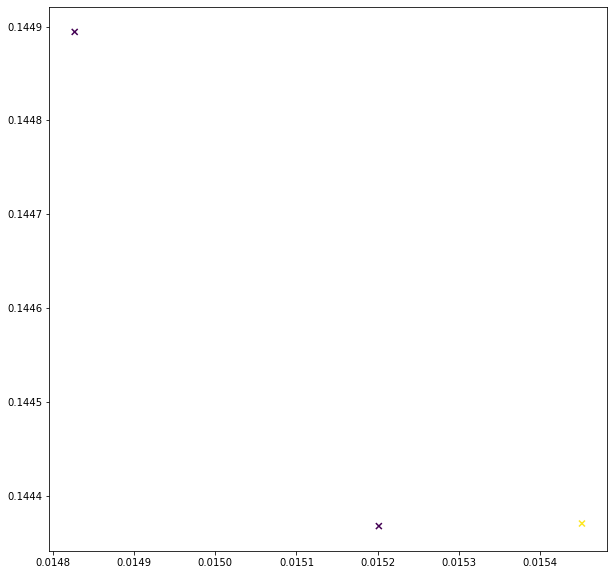

[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 128, 129, 130, 131, 132, 133, 134]


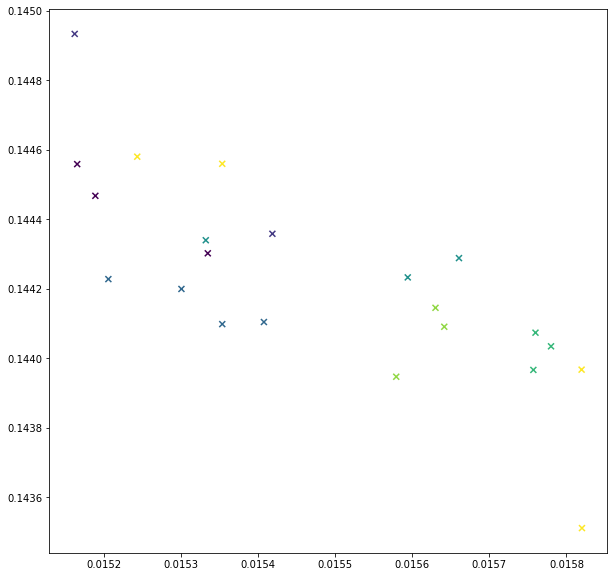

[67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]


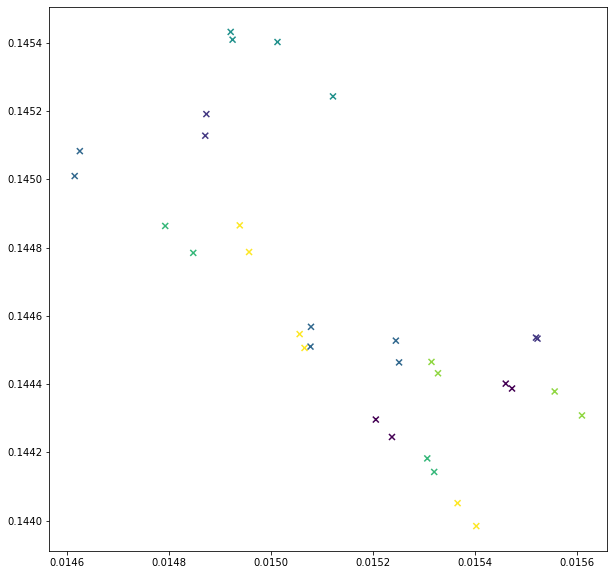

[83, 84, 85, 86, 151, 152, 153, 154, 155, 156]


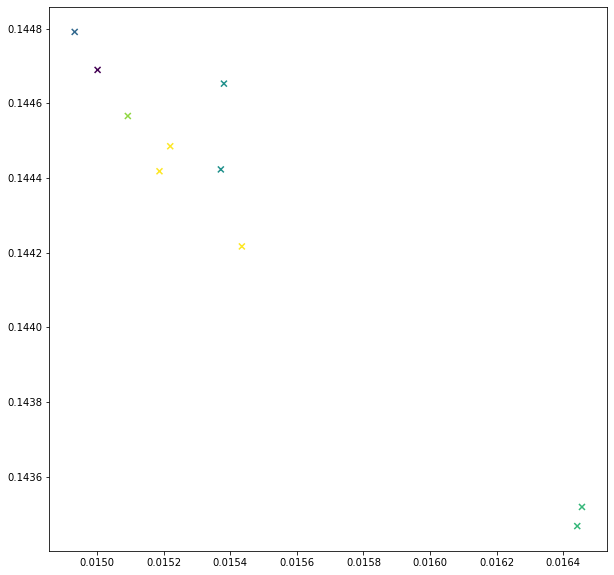

[157, 158, 159, 160]


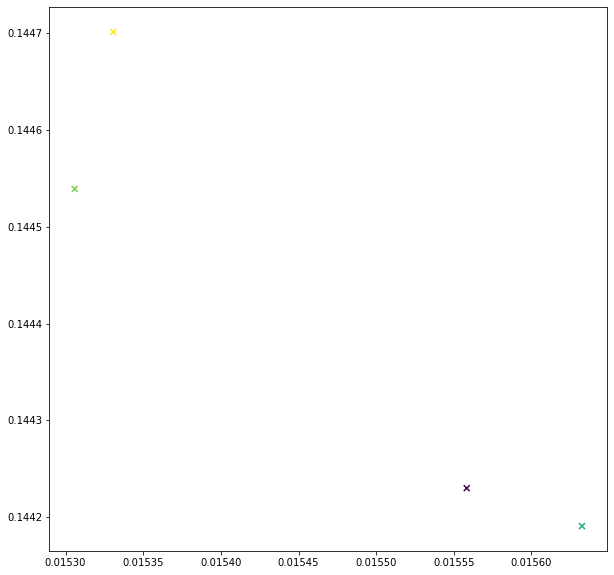

[161, 162, 163, 164, 165]


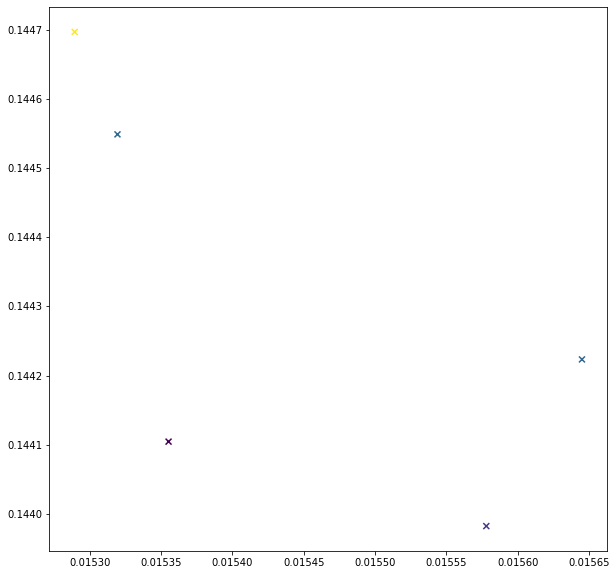

[87, 88, 89, 90]


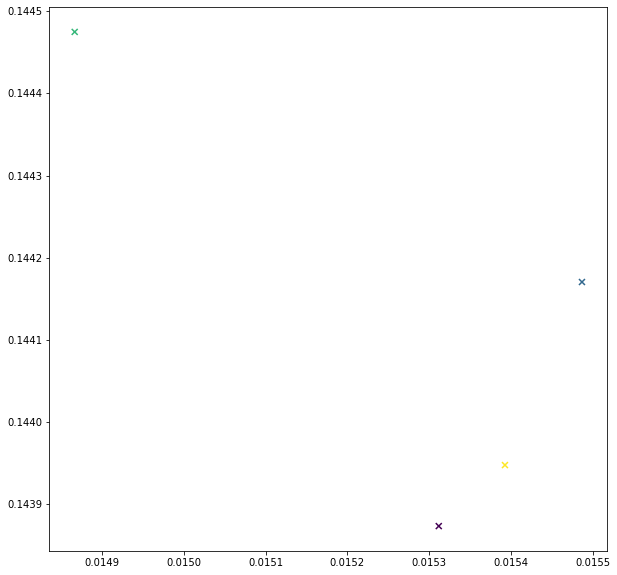

[166, 167, 168, 169, 170, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]


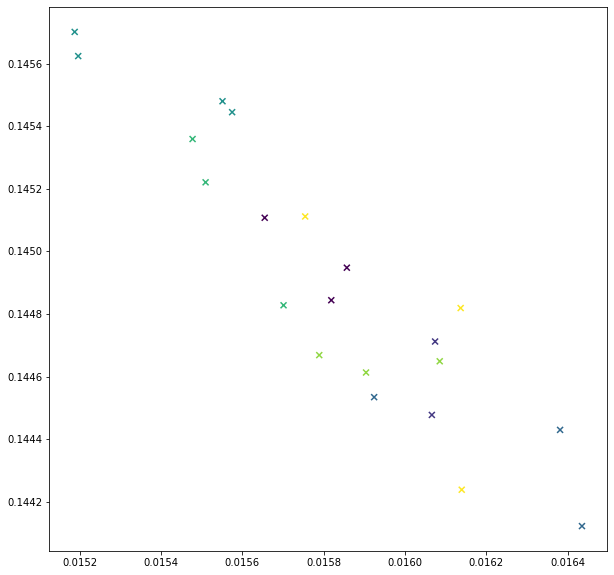

[171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311]


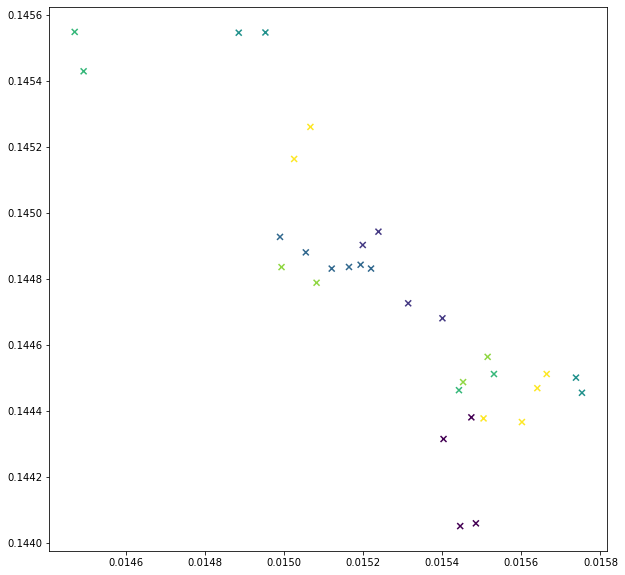

[187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 312, 313, 314, 315, 316, 317]


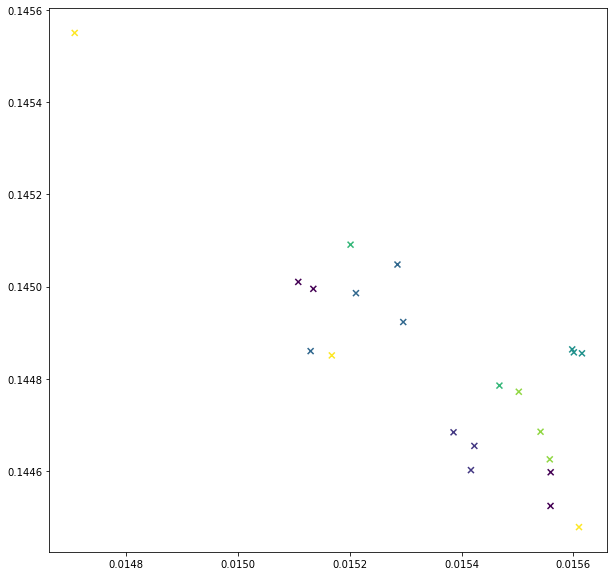

[203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218]


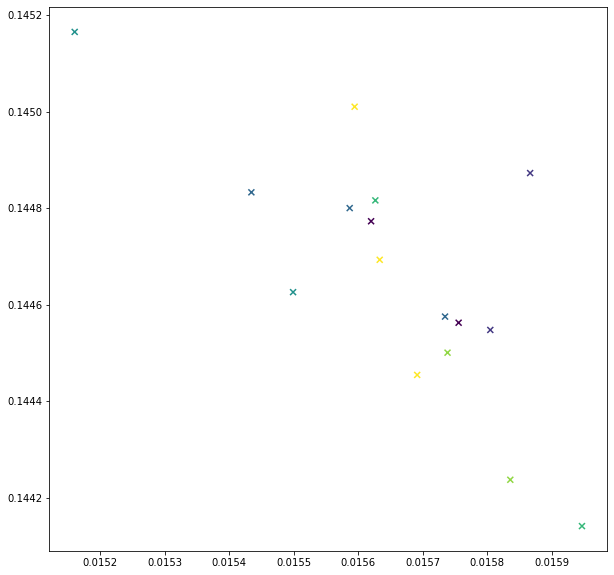

[318, 319, 320, 321]


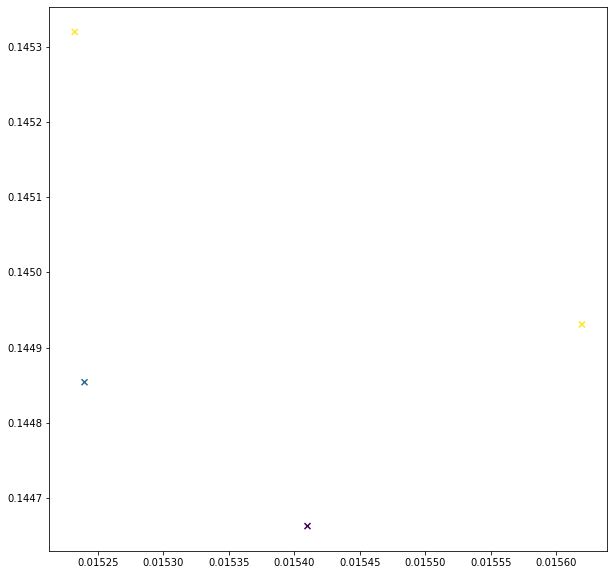

[235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337]


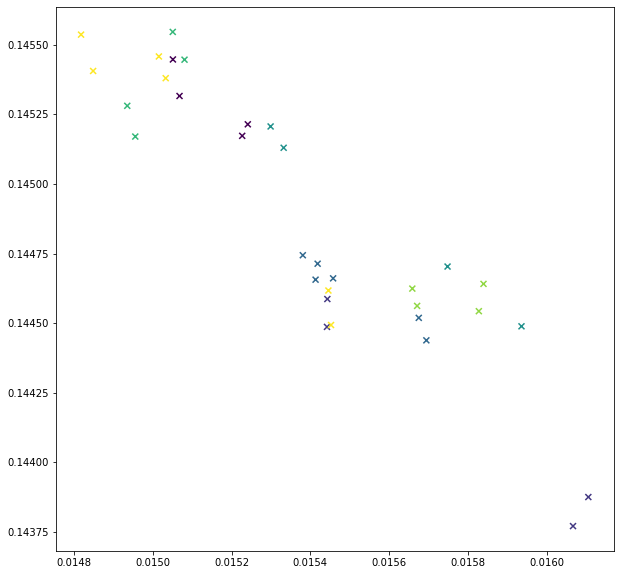

[251, 252, 253, 254, 255, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348]


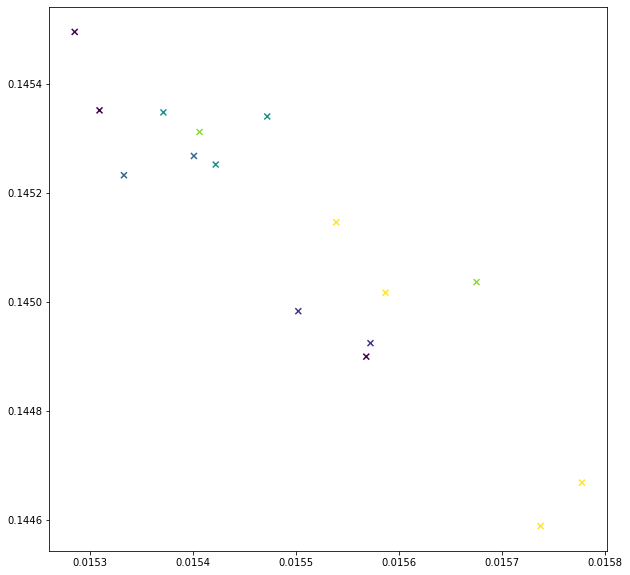

[256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364]


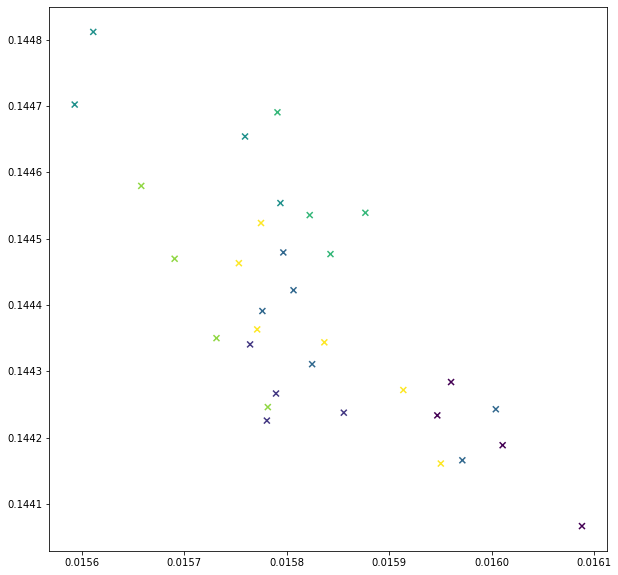

[272, 273, 274, 275, 276, 277, 278, 279, 365, 366, 367, 368, 369, 370, 371, 372, 373]


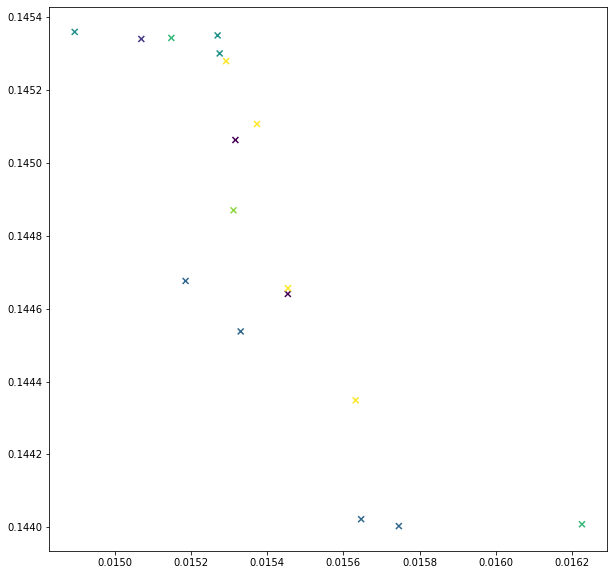

[219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234]


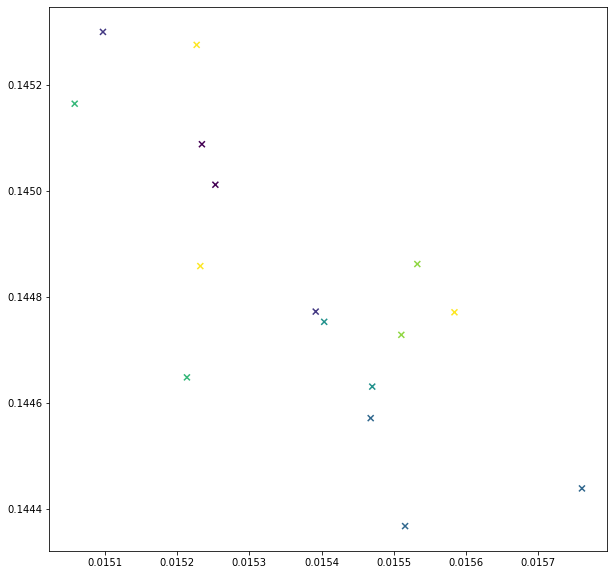

[374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389]


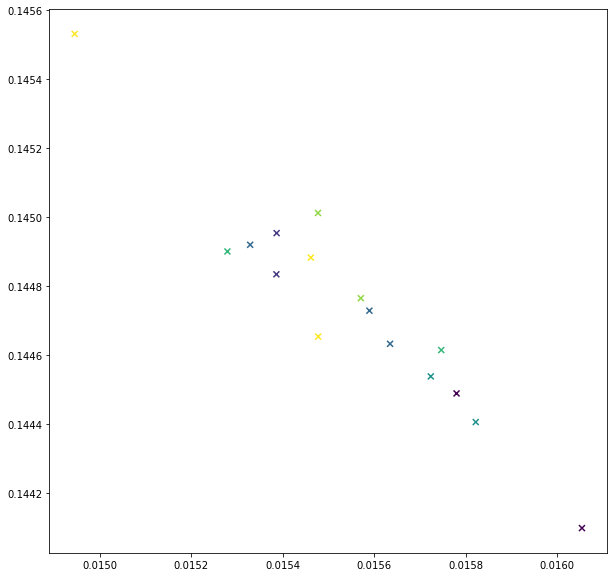

[390, 391, 392, 393, 394, 395, 591, 592]


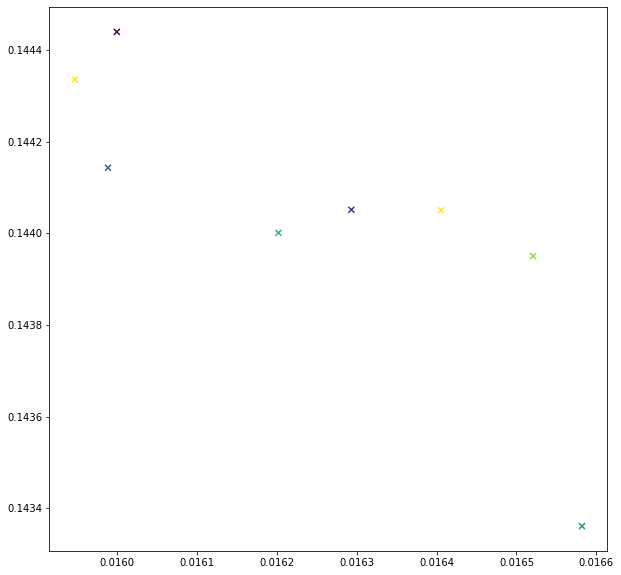

[593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608]


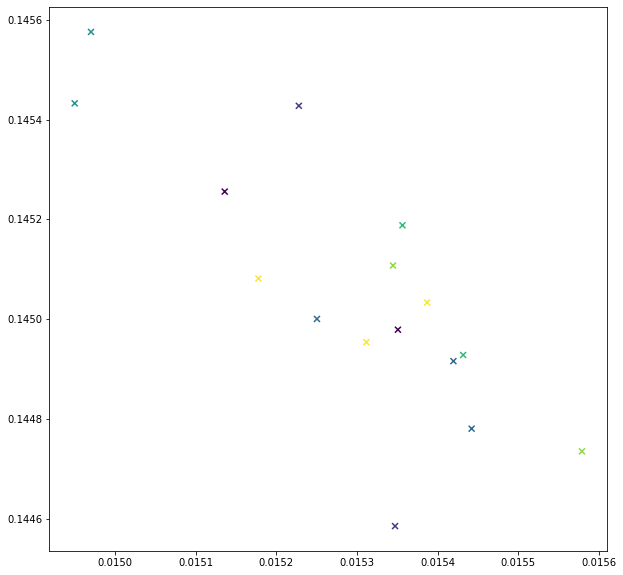

[396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624]


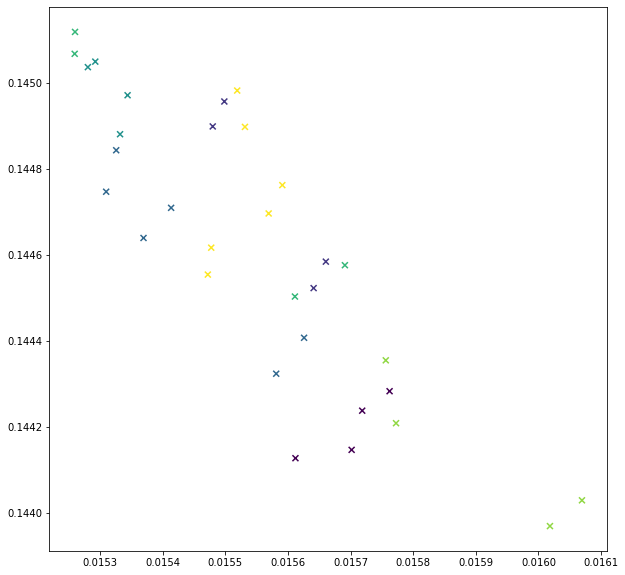

[412, 413, 414, 415, 416, 417, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640]


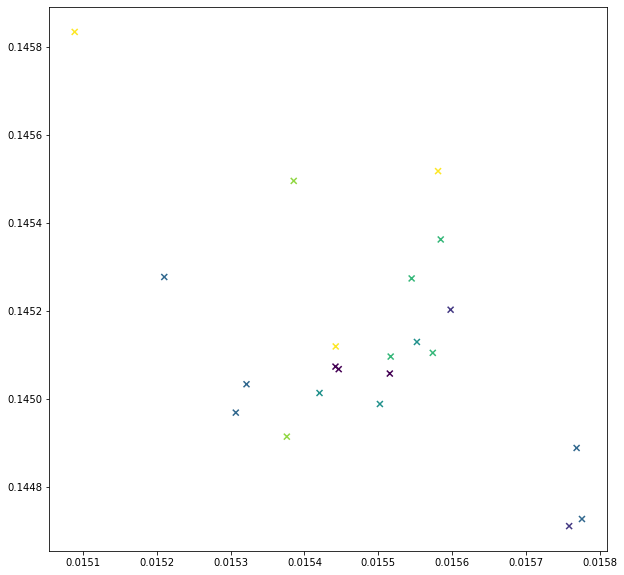

[418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656]


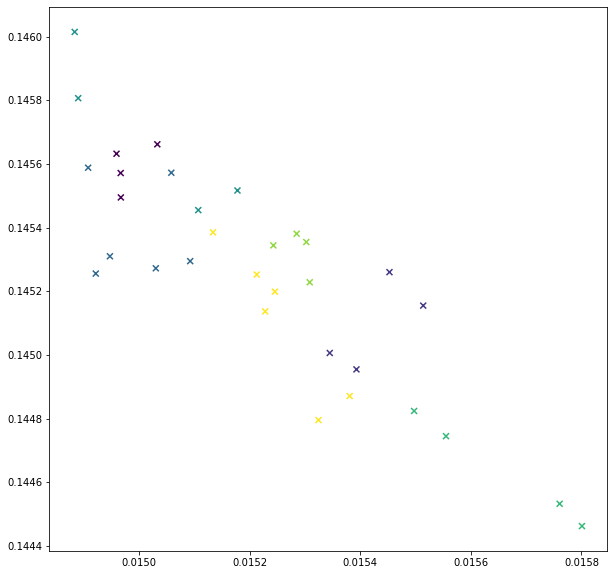

[434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672]


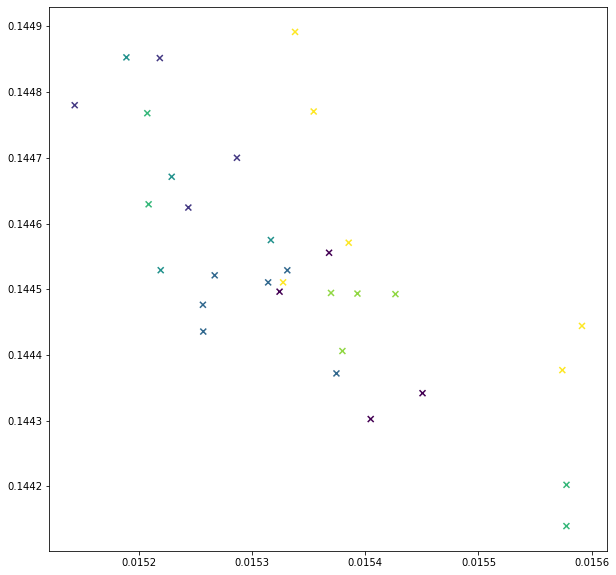

[450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463]


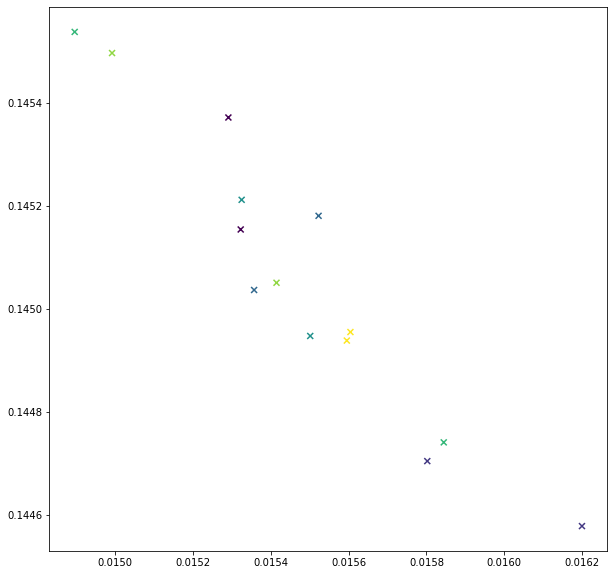

[673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688]


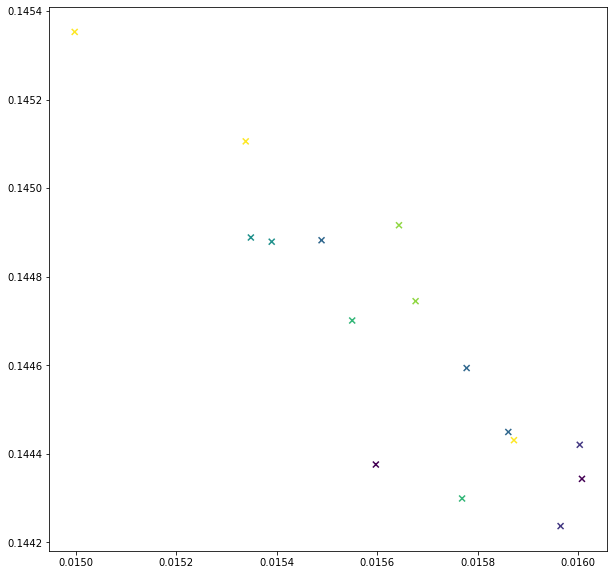

[464, 689, 690]


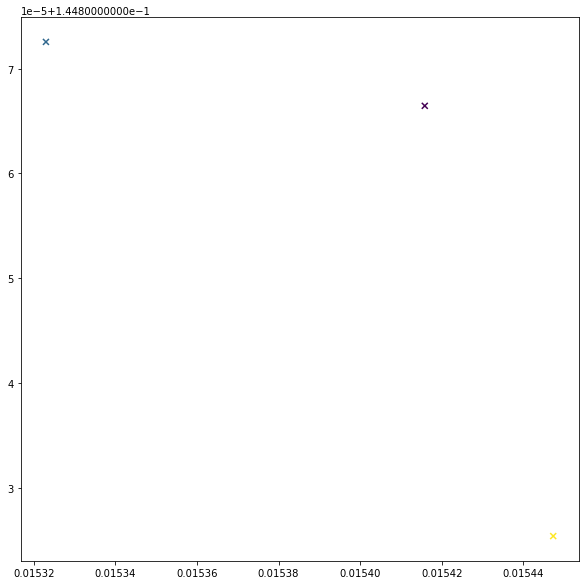

[465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706]


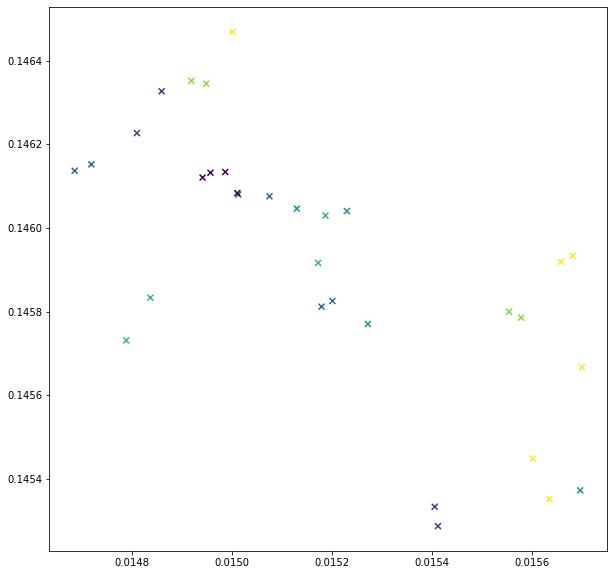

[481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722]


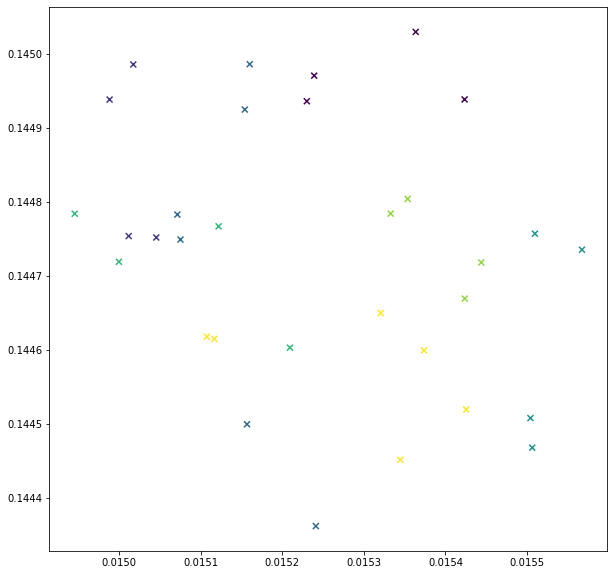

[497, 498, 499, 500, 501, 502, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738]


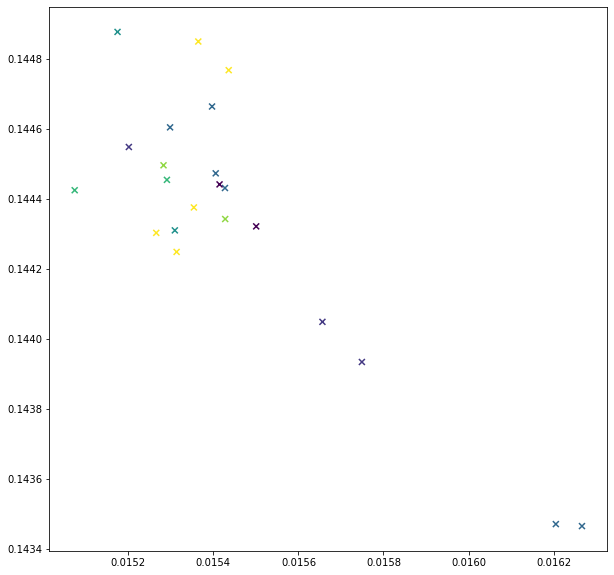

[503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 739, 740, 741, 742, 743]


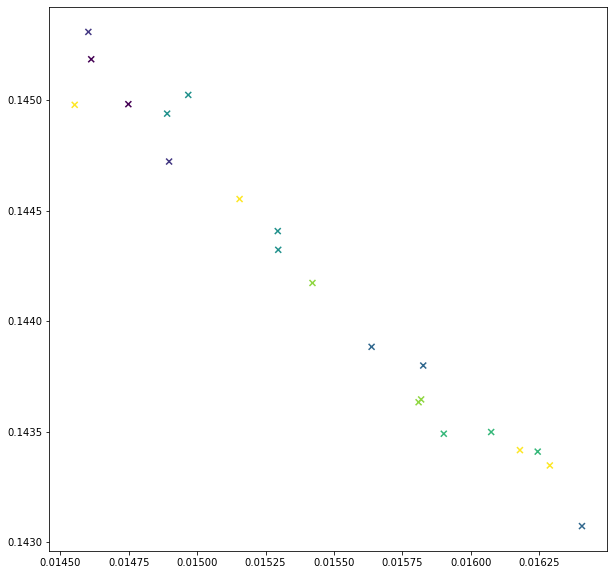

[519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759]


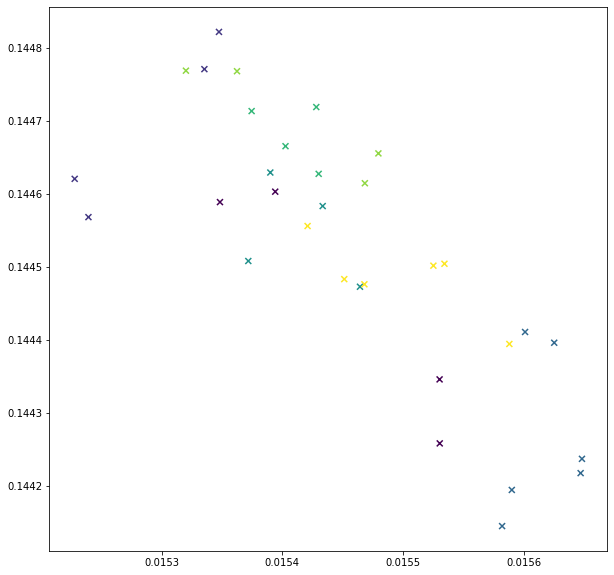

[535, 536, 537, 538, 539, 540, 541, 542, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775]


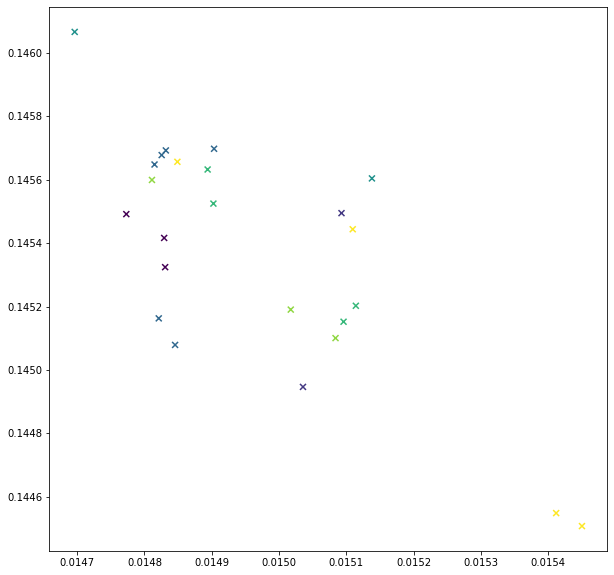

[543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791]


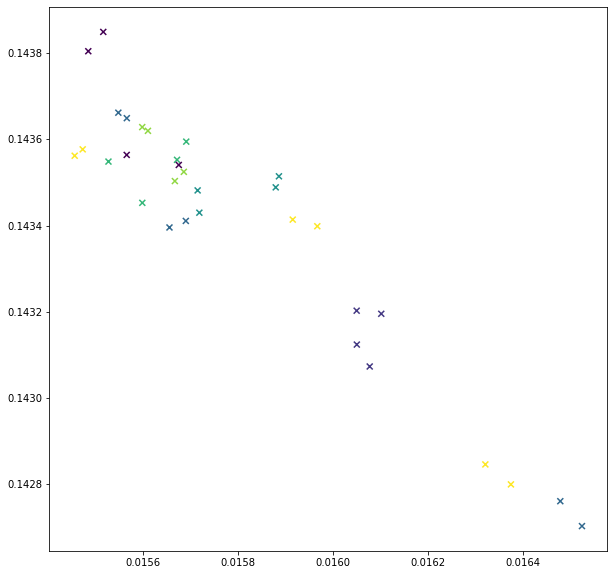

[559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807]


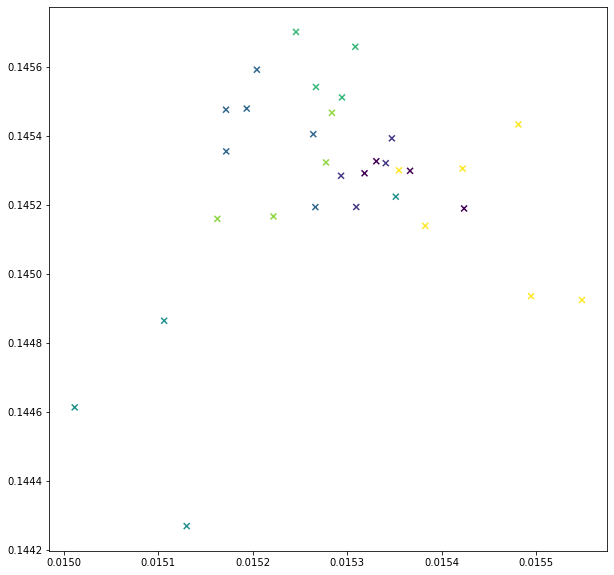

[575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590]


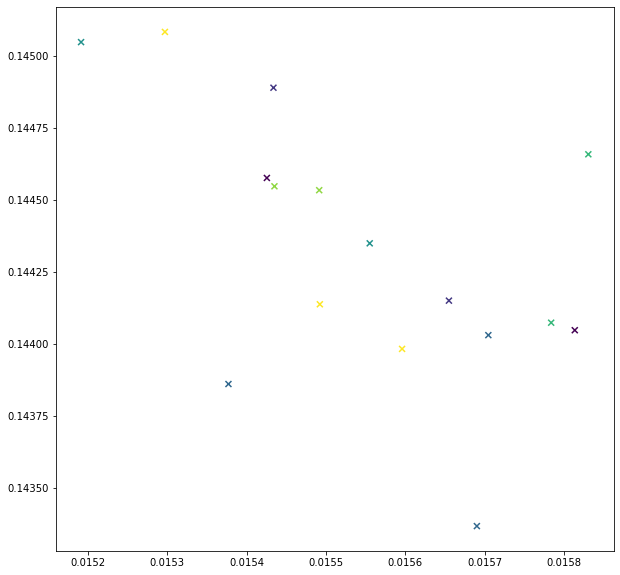

[808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823]


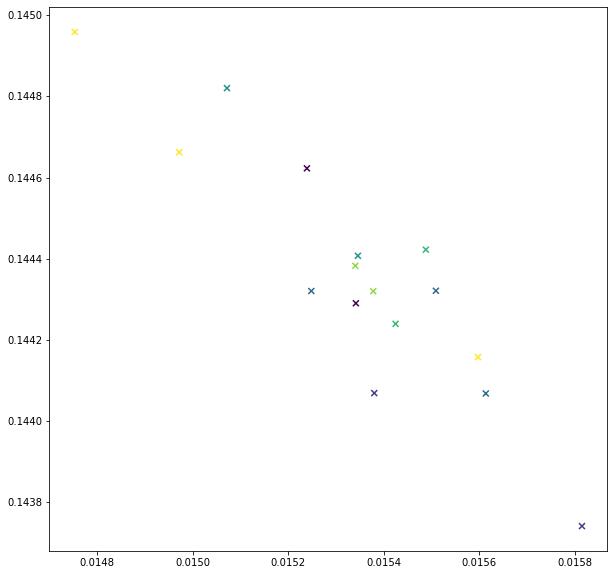

[925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937]


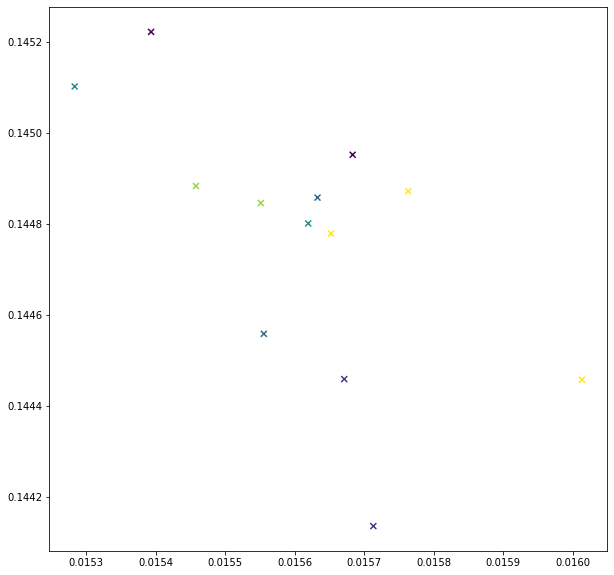

[938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953]


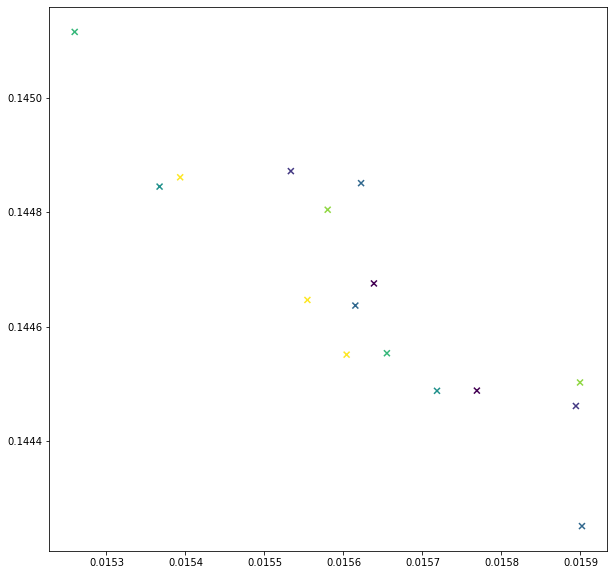

[824, 825, 826, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969]


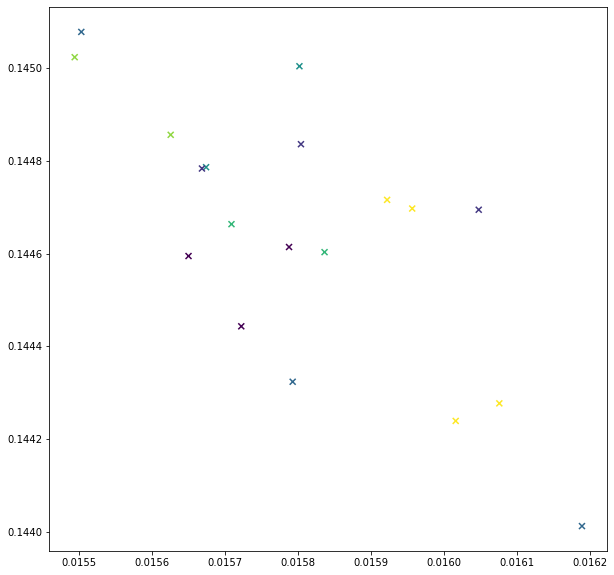

[827, 828, 829, 830, 831, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985]


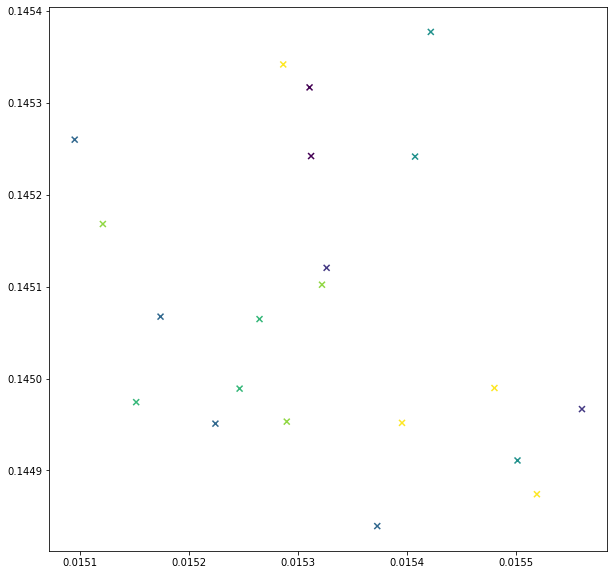

[832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 986, 987]


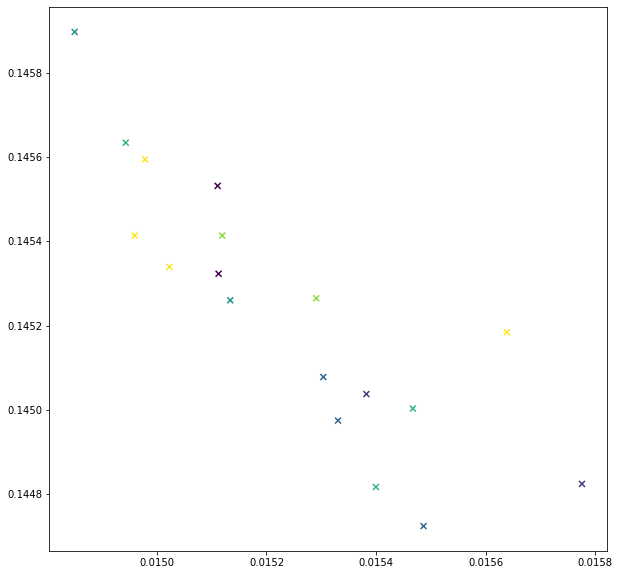

[848, 849, 850, 851, 852, 853, 854, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003]


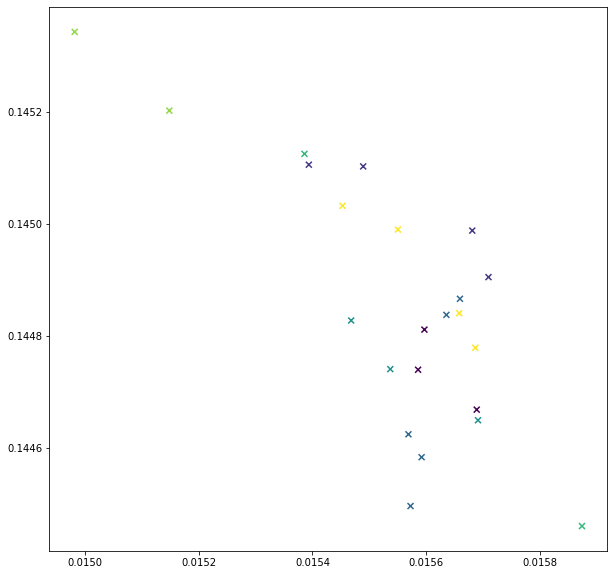

[1004, 1005, 1006]


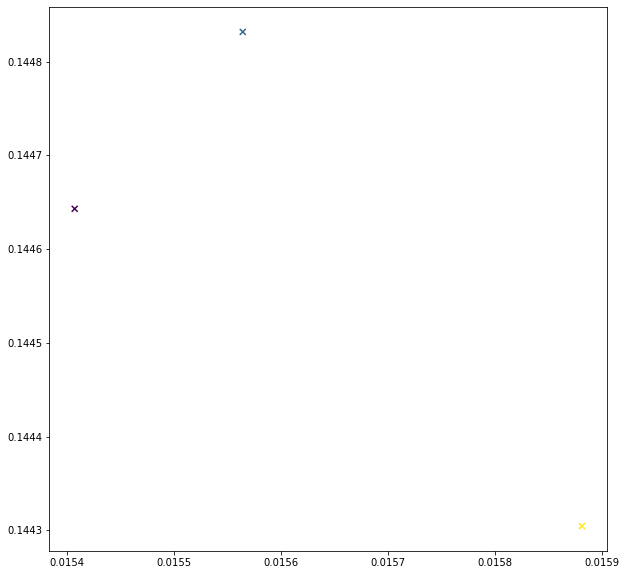

[855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022]


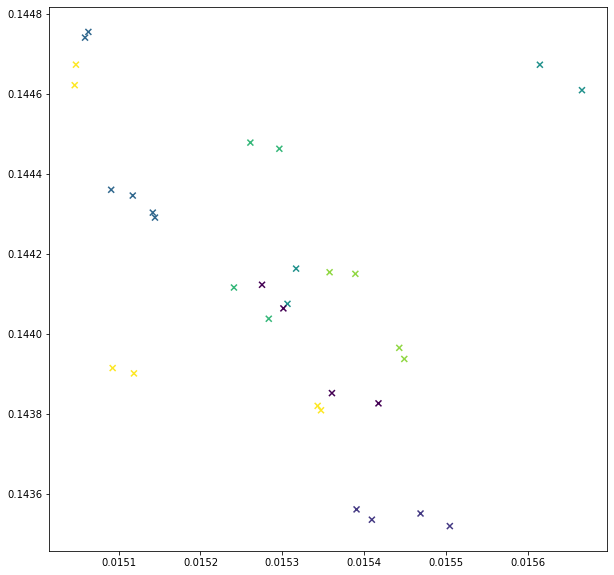

[871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038]


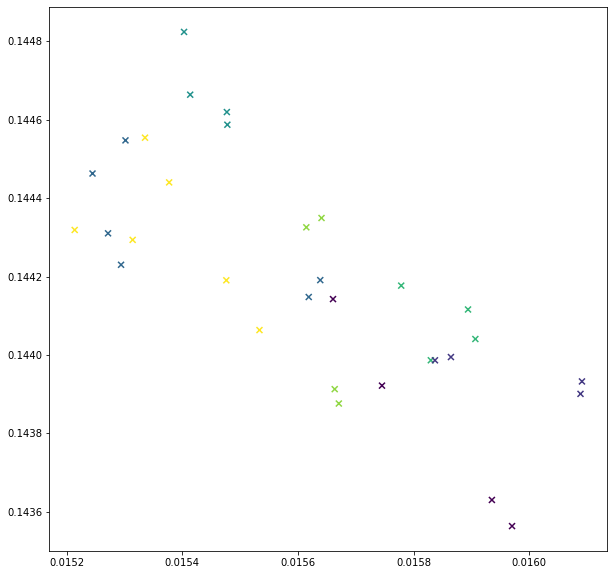

[887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902]


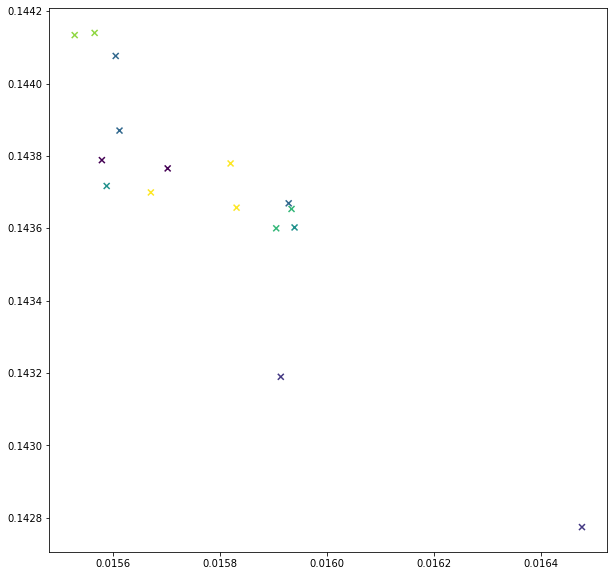

[1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054]


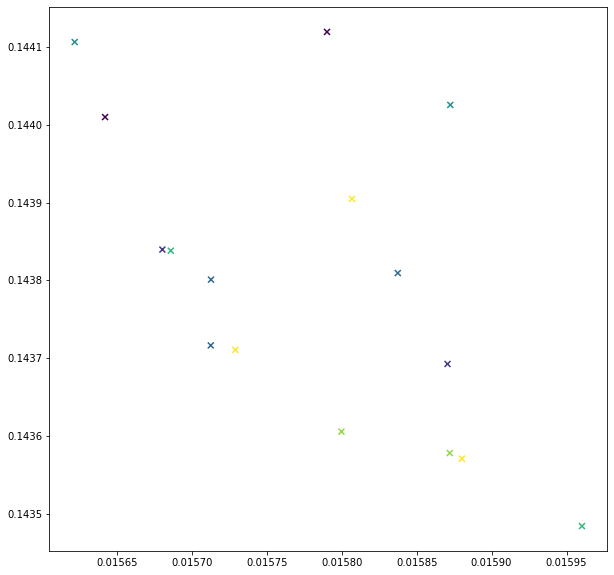

[903, 904, 905, 906, 907, 908, 1055, 1056, 1057, 1058, 1059]


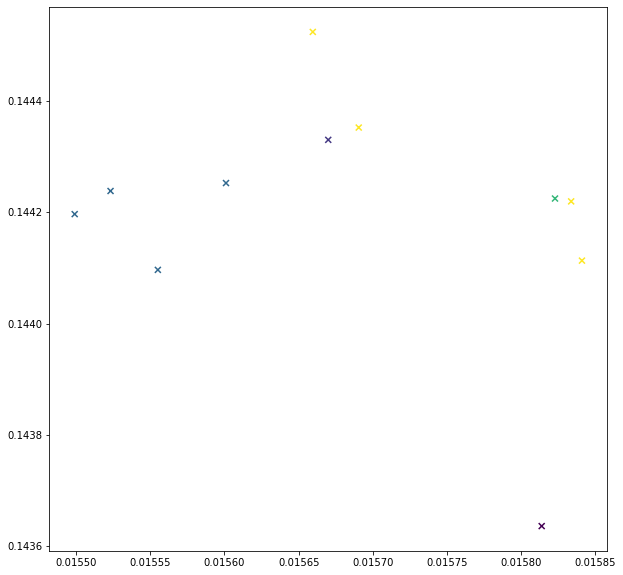

[909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075]


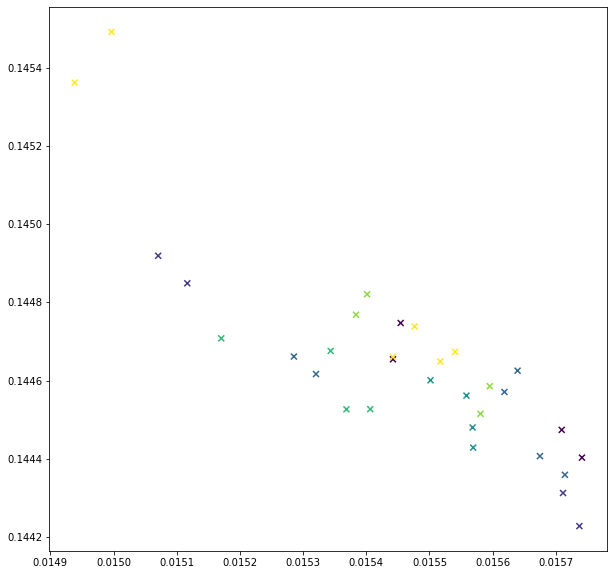

[1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091]


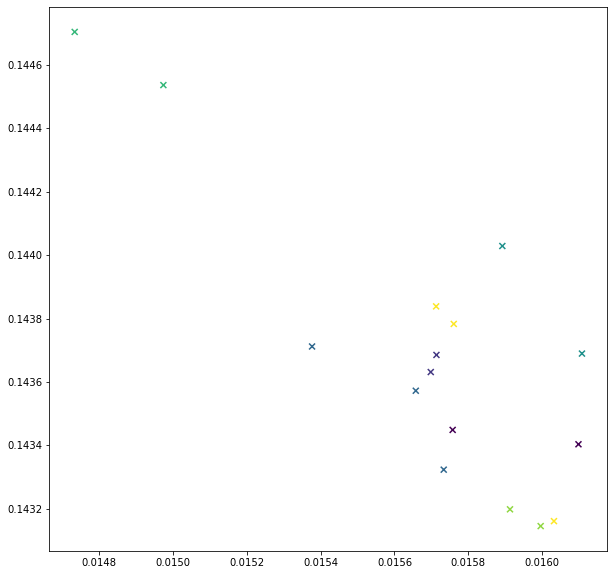

[1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106]


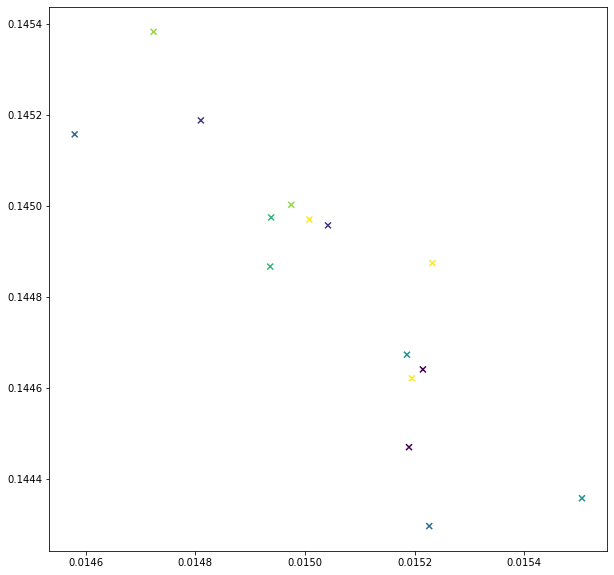

[1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122]


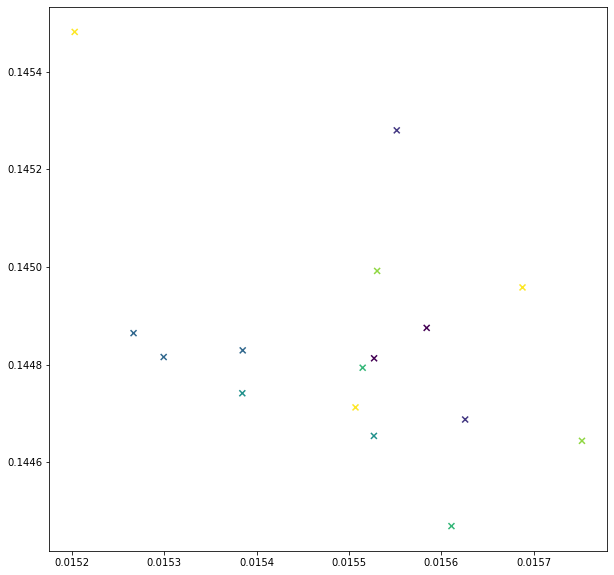

[1123, 1124, 1125, 1126, 1127, 1128]


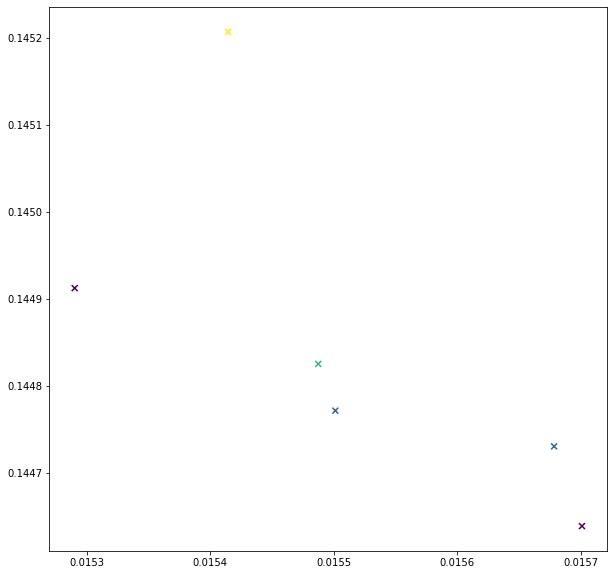

[1129, 1130, 1131, 1132, 1133]


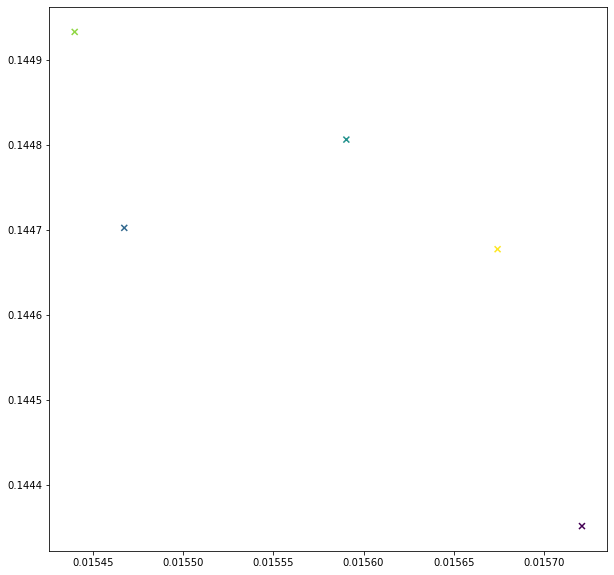

[1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149]


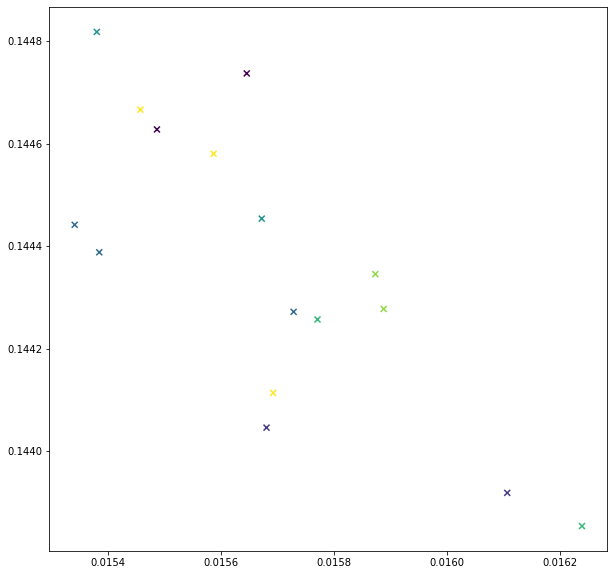

[1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181]


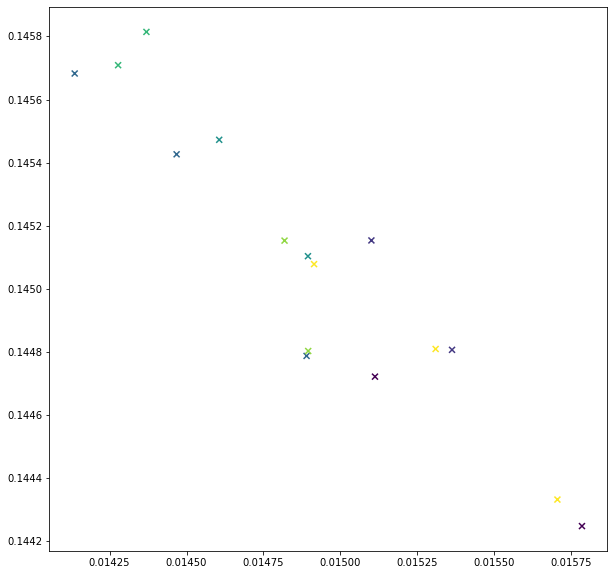

[1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197]


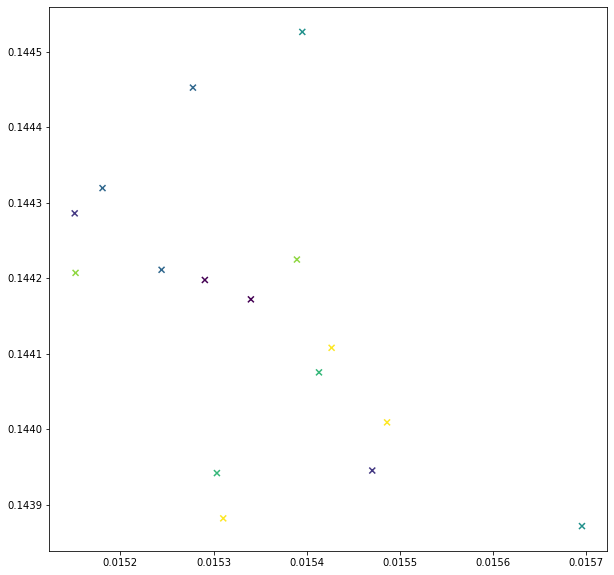

[1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213]


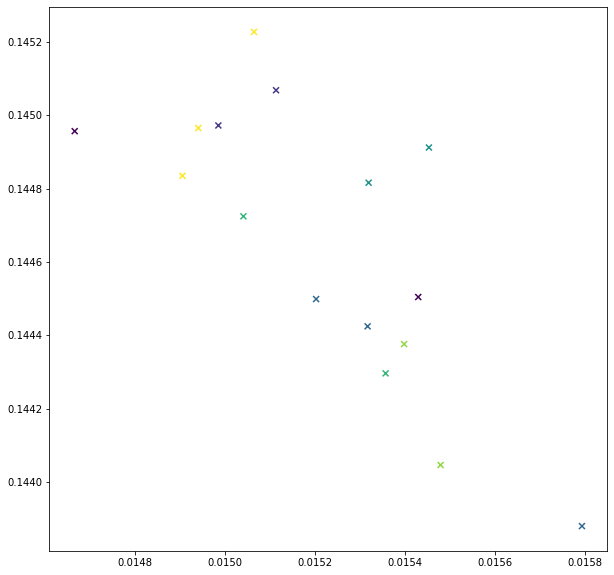

[1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165]


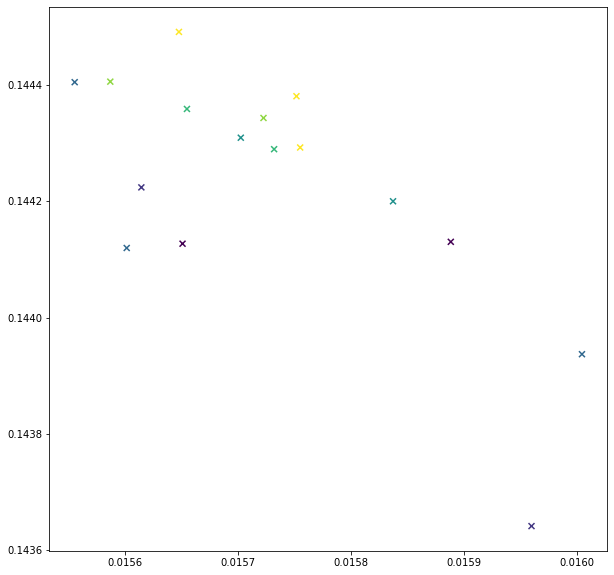

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = features
for id,j in enumerate(lists):
# j = j.index.tolist()
    print(j)
    plt.figure(figsize=(10,10))
    plt.scatter(X[j, 0], X[j, 1], c=truelabels[j],marker = 'x')
    plt.show()


# plt.figure(figsize=(10,10))
# plt.scatter(X[j, 0], X[j, 1], c=labels[j], marker='x')
# plt.show()

In [111]:
for j in lists:
#     print(j)
    for i in j:
        if i >1214 :
            print(i)

1215


In [64]:
df = pd.DataFrame(lists)
df[0]

0        0
1        3
2       19
3      593
4       35
5       49
6       52
7       67
8       83
9      157
10     161
11      87
12     465
13     481
14     497
15     503
16     519
17     535
18     543
19     559
20     575
21     166
22     171
23     940
24     187
25     203
26     318
27     235
28     251
29     256
30     272
31     855
32     871
33     887
34    1041
35     903
36     909
37    1078
Name: 0, dtype: int64

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(X[lists[0], 0], X[lists[0], 1], c=truelabels[df[0]])
plt.show()


TypeError: list indices must be integers or slices, not Series

<Figure size 720x720 with 0 Axes>